# DIMENSIONALITY REDUCTION

#### Cons
- Reducing dimensionality does lose some information.
- Project pipeline bit more complex and harder to maintain.

#### Pros
- Fast training due to removal of unimportant and reduntant features.
- Data Visualization - detecting pattern such as clusters on less dimensions are easy.


### The Curse of Dimensionality
- If we pick a random point in a unit square, it will have only about a 0.4% chance of being located less than 0.001 from a border (in other words, it is very unlikely that a random point will be “extreme” along any dimension). But in a 10,000-dimensional unit hypercube, this probability is greater than 99.99%. Most points in a high-dimensional hypercube are very close to the border (Extreme along a single dimention).
- High-dimensional datasets are at risk of being very sparse: most training instances are likely to be far away from each other.
- The more dimensions the training set has, the greater the risk of overfitting it.

### Main Approaches for Dimensionality Reduction
<b>Projection</b> and <b>Manifold Learning</b>

### Projection
- Many features are almost constant, while others are highly correlated
- All training instances actually lie within (or close to) a much lower-dimensional subspace of the high-dimensional space.
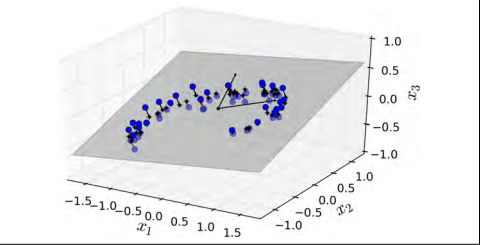
- we get the new 2D dataset by projecting all training instances on subspace shown in the figure.

<b>why is projection not the best approach always?</b><br>
Its important to know that how a data set is structured, eg. - Projection will fail on <i>swiss roll</i> dataset while unrolling will work.
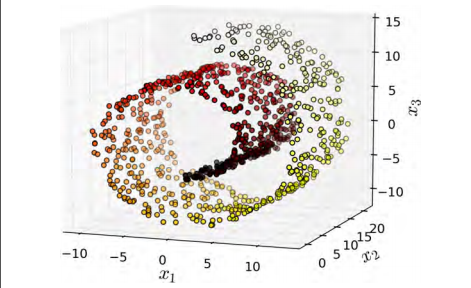
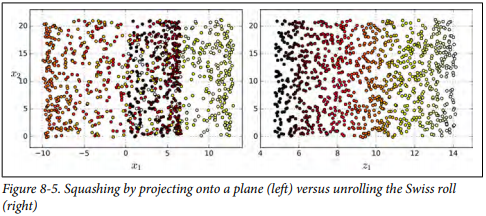

### Manifold Learning
A d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane.<br>
Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie.
- Swiss roll dataset is a 2D manifold, d=2 n=3.
    - 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space.
- It relies on the <b>manifold assumption</b>, also called the <b>manifold hypothesis</b>, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold.
- The manifold assumption is often accompanied by another implicit assumption: that the task at hand (e.g., classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold, as shown in the figure below.
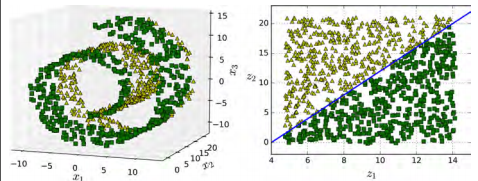
- However, the previous assumption may not always be true, <b>making dimentionality reduction a data dependent choice</b>.
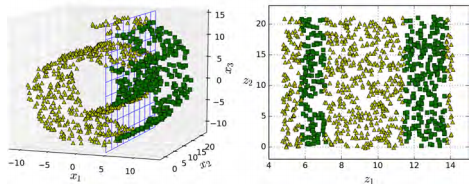

### Principal Component Analysis (PCA)
First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

#### Preserving the variance
The simple idea behind PCA - axis that minimizes the mean squared distance between the original dataset and its projection onto that axis.
- It is reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections.
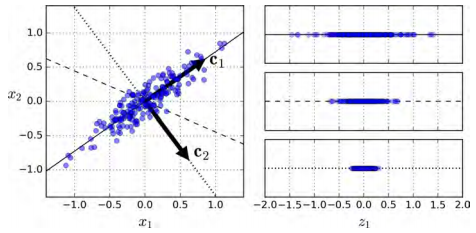
- Projection along C1 preserves the maximum variance while axis along dotted preserves very little variance.

#### Principal Components
- PCA identifies the axis that accounts for the largest amount of variance in the training set. 
- It also finds a second axis, <b>orthogonal to the first one</b>, that accounts for the largest amount of remaining variance.
-  If it were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes. (axes = dimensions)

The unit vector that defines the $i^{th}$ axis is called the $i^{th}$ <b>principal component</b> (PC).<br>
- <b>C1 and C2</b> are two principle components in above example.
- The direction of the principal components is not stable. However, the plane they define will generally remain the same on rerunning the PCA. 

<u>Singular Value Decomposition (SVD)</u> 
- standard matrix factorization technique which decomposes the training set matrix X into the dot product of three matrices $U·Σ·V^T$.
- $V^T$ contains all the principal components that we are looking for
$
\mathbf{V}^T =
\begin{pmatrix}
  \mid & \mid & & \mid \\
  \mathbf{c_1} & \mathbf{c_2} & \cdots & \mathbf{c_n} \\
  \mid & \mid & & \mid
\end{pmatrix}
$

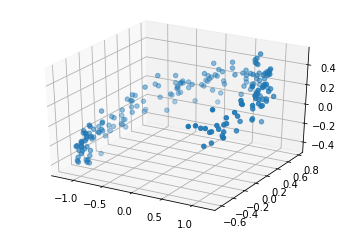

In [1]:
# Create 3d dataset
import numpy as np
np.random.seed(4)
m = 200
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
# Third axis is just weighted sum of two axis and some noise.
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2])

In [2]:
# using NumPy’s svd() function to obtain all the principal components of the training set.
# PCA assumes that the dataset is centered around the origin.
# Scikit-Learn’s PCA classes take care of centering the data, while implementing ourselves we have to centre the data first.
X_centered = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X_centered)
# Transpose the V and select 1st and 2nd column as c1 and c2.
c1 = V.T[:, 0]
c2 = V.T[:, 1]
# c1 and c2 here are 3d points and line from centre to that point defines PC axis.

#### Projecting Down to d Dimensions
- we can reduce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first d principal components.
- $W_d$ - matrix containing the first d principal components.
- projection on a plane can be found by dot product.
$
\mathbf{X}_{d\text{-proj}} = \mathbf{X} \cdot \mathbf{W}_d
$

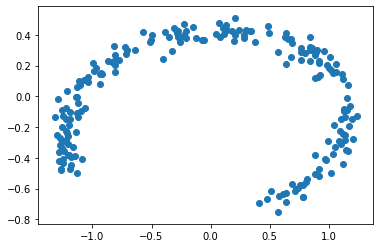

In [3]:
# Two dimentional representation of 3d datset.
# Select 2 principle components.
W2 = V.T[:, :2]
X2D = X_centered.dot(W2)

plt.scatter(X2D[:, 0], X2D[:, 1])
plt.show()

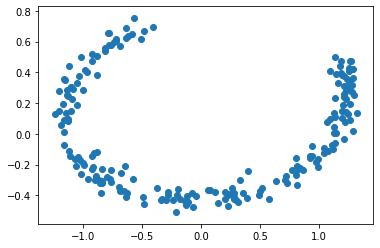

In [4]:
# implementation on sklearn
# it automatically takes care of centering the data
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

plt.scatter(X2D[:, 0], X2D[:, 1])
plt.show()

# we can access the principal components using transpose the components_ variable
# i.e., c1 = pca.components_.T[:,0])

#### Explained Variance Ratio
It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

In [5]:
print('Explained Variance Ratio along C1 -', pca.explained_variance_ratio_[0])
print('Explained Variance Ratio along C2 -', pca.explained_variance_ratio_[1])

# A very less proportion of data is left for 3rd axis
# That means only that much data is lost by projecting

Explained Variance Ratio along C1 - 0.8618954031574542
Explained Variance Ratio along C2 - 0.12913398977295854


#### Choosing the Right Number of Dimensions
- Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).
- Unless, of course, you are reducing dimensionality for data visualization—in that case you will generally want to reduce the dimensionality down to 2 or 3.

In [6]:
# minimum number of dimensions required to preserve 95% of the training set’s variance
pca = PCA()
pca.fit(X)
# Cummulative sum
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print('Dimensions required to preserve 95% of variance -', d)

Dimensions required to preserve 95% of variance - 2


In [7]:
# We can now set n_components=d and run PCA again

# Alternatively we can also set n_componets <1, it will define threshhold variance proportion
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

print('Dimensions of reduced dataset -', len(X_reduced[0]))

Dimensions of reduced dataset - 2


We can also plot cumsum of explained variance ratio against number of dimensions to get an elbow curve and choose number of dimensions accordingly.
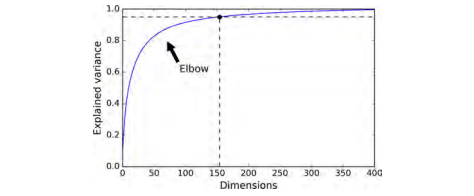

#### PCA for Compression
- If we use PCA on MNIST dataset features will be reuced to around 150 from 784, So we can use PCA for compression.
- We can use inverse_transform() method to decompress it back to 784 dimensions.
- This won’t give us back the original data, since the projection lost a bit of information.
    - The mean squared distance between the original data and the reconstructed data is called the <b>reconstruction error</b>.

In [8]:
# Understand this function ...

import matplotlib as mpl
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# X_mnist will have the original data
X_mnist = mnist['data']

pca = PCA(n_components = 0.95)
# Compress the dataset to conserve 95% of variance
X_mnist_reduced = pca.fit_transform(X_mnist)
print('Reduced Dimensions :', len(X_mnist_reduced[0]))

X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)
# Reconstruct the dataset using the compressed data

Reduced Dimensions : 154


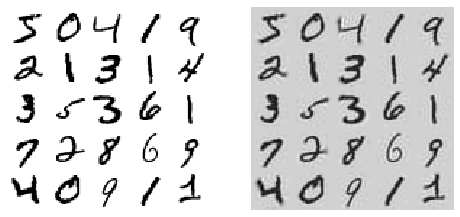

In [10]:
plt.figure(figsize=(8,4))
# Plot digits before compression
plt.subplot(121); plot_digits(X_mnist[:25], images_per_row=5)
# Plot digits after compression
plt.subplot(122); plot_digits(X_mnist_recovered[:25], images_per_row=5)
plt.show()

#### PCA inverse transformation, back to the original number of dimensions

$
\mathbf{X}_{\text{recovered}} = \mathbf{X}_{d\text{-proj}} \cdot {\mathbf{W}_d}^T
$<br>
We are using <b>transpose of $𝑊_𝑑$</b> - matrix containing the first d principal components and taking its dot product with <b>projected data (Reduced data)</b>.

### Incremental PCA
- PCA requires the whole training set to fit in memory in order for the SVD algorithm to run.

Incremental PCA (IPCA) algorithms : we can split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time.
- useful for large training sets, and also to apply PCA online (i.e., on the fly, as new instances arrive).

In [11]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
# passing 0.95 as n_components doesn't work with sklearn.decomposition.IncrementalPCA
# maybe beacuse variance to conserve cant be calculated with partial_fit().
inc_pca = IncrementalPCA(n_components=154)

# spliting the MNIST dataset into 100 mini-batches using NumPy’s array_split() function
for X_batch in np.array_split(X_mnist, n_batches):
    # We must call the partial_fit() method with each mini-batch
    inc_pca.partial_fit(X_batch)

X_mnist_reduced = inc_pca.transform(X_mnist)

#### NumPy’s memmap class 
- Alternative to above mentioned method.
- Allows us to manipulate a large array stored in a binary file on disk as if it were entirely in memory; the class loads only the data it needs in memory, when it needs it.
- This makes it possible to call the usual fit() method.

In [12]:
filename = "my_mnist.data"
m, n = X_mnist.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
# Copied the data into memmap structure
X_mm[:] = X_mnist

del X_mm
# Now deleting the memmap() object will trigger its Python finalizer, which ensures that the data is saved to disk.

In [13]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=700, copy=True, n_components=154, whiten=False)

### Randomized PCA
- This is a stochastic algorithm that quickly finds an approximation of the first d principal components.
- Its computational complexity is $O(m × d^2) + O(d^3)$, instead of $O(m × n^2)+ O(n^3)$.
- So it is dramatically faster than the previous algorithms when d is much smaller than n.

In [14]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
# Again we cant use fraction as n_components when the solver is randomised
X_mnist_reduced = rnd_pca.fit_transform(X_mnist)

print('Reduced Dimensions :', len(X_mnist_reduced[0]))

Reduced Dimensions : 154


### Kernel PCA


<b>Kernel Trick</b> - a mathematical technique that implicitly maps instances into a very high-dimensional space (called the feature space), enabling nonlinear classification and regression with Support Vector Machines.<br>
- We can think of these as methods by which we can define a non-linear space to divide the data.
- This is mathematically equivalent to mapping the training set to an infinite-dimensional feature space using the feature map φ, then projecting the transformed training set down to required dimensions using linear PCA.
-  It is often good at performing complex nonlinear projections, preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

Study the math behind Kernel Tricks.**


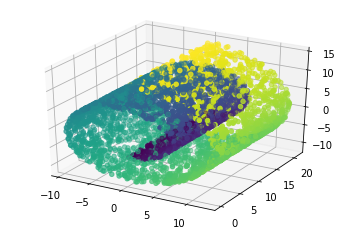

In [15]:
from sklearn.datasets import make_swiss_roll
X,y = make_swiss_roll(n_samples=5000, noise=0.0, random_state=None)
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)

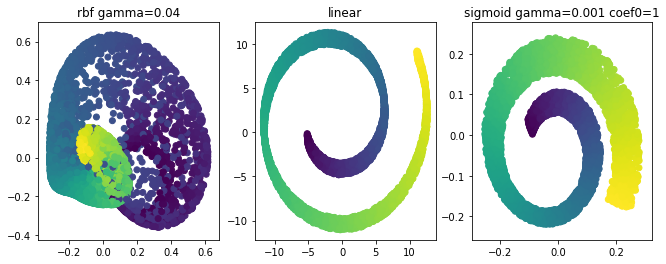

In [16]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04, fit_inverse_transform=True, random_state=10)
linear_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True, random_state=10)
sigmoid_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True, random_state = 10)

fig, ax = plt.subplots(1,3, figsize = (11,4))
X_reduced = rbf_pca.fit_transform(X)
ax[0].scatter(X_reduced[:,0], X_reduced[:,1], c = y)
ax[0].set_title('rbf gamma=0.04')

X_reduced = linear_pca.fit_transform(X)
ax[1].scatter(X_reduced[:,0], X_reduced[:,1], c = y)
ax[1].set_title('linear')

X_reduced = sigmoid_pca.fit_transform(X)
ax[2].scatter(X_reduced[:,0], X_reduced[:,1], c = y)
ax[2].set_title('sigmoid gamma=0.001 coef0=1')

plt.show()

### Selecting a Kernel and Tuning Hyperparameters
- As kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyperparameter values.
- dimensionality reduction is often a preparation step for a supervised learning task (e.g., classification), so you can simply use grid search to select the kernel and hyperparameters that lead to the best performance on that task.


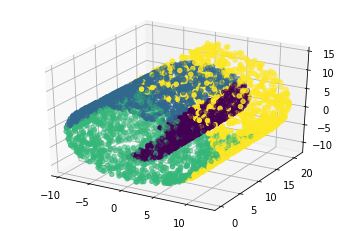

In [17]:
# Converting y into categories
# np.digitize takes in the array of values and bins limit as input.
z = np.digitize(y, bins=np.linspace(min(y), max(y)+0.001, 5)) # 5 equaly spaced values between min and max.
# 5 values are required to define boundaries for 4 bins
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=z)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])
# We can also use grid parameters on a pipeline.
# This can be done using EstimatorName__Parameter
param_grid = [{
    "kpca__gamma": np.linspace(0.001, 0.05, 20), # 20 numbers between 0.001 and 0.05
    "kpca__kernel": ["rbf", "sigmoid"]
}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, z)

print(grid_search.best_params_)

{'kpca__gamma': 0.031947368421052634, 'kpca__kernel': 'rbf'}


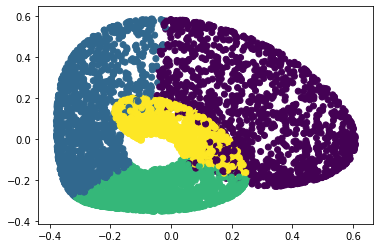

In [19]:
# Visualization of best reduction Kernel
best_pca = KernelPCA(n_components = 2, kernel=grid_search.best_params_['kpca__kernel'],
                     gamma=grid_search.best_params_['kpca__gamma'], coef0=1, fit_inverse_transform=True, random_state = 10)
X_reduced = best_pca.fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = z)
plt.show()

#### Method 2
- Another approach would be to select the kernel and hyperparameters that yield the <b>lowest reconstruction error</b>.(This method is completely unsupervised)
- When we use kernel trick we first tranform the data into infinite dimension feature space, which is then projected on required dimensions. So, the reconstructed points will be on feature space not in actual dimensions.
- So for this approach we have to keep a reconstruction pre image, which is obtained by hyperparameter fit_inverse_transform=True

Best kernel : sigmoid
Best Gamma : 0.05


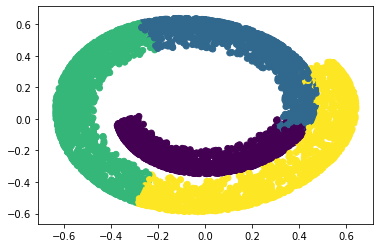

In [20]:
from sklearn.metrics import mean_squared_error
kernels = ['rbf', 'sigmoid']
gammas=np.linspace(0.001, 0.05, 20)
min_error = np.Inf

for kernel in kernels:
    for gamma in gammas:
        pca = KernelPCA(n_components = 2, kernel=kernel, gamma=gamma, fit_inverse_transform=True, random_state=10)
        X_reduced = pca.fit_transform(X)
        X_preimage = pca.inverse_transform(X_reduced)
        error = mean_squared_error(X, X_preimage)
        if error < min_error:
            min_error = error
            best_kernel = kernel
            best_gamma = gamma
            best_X_reduced = X_reduced

print('Best kernel :', kernel)
print('Best Gamma :', gamma)
plt.scatter(best_X_reduced[:,0], best_X_reduced[:,1], c = z)
plt.show()

However it is possible that a particular kernel and gamma value will give us a better reconstruction accuracy but may be not the best model for our final task.<br>
So optimising method of kernel PCA will depend on our requirements.

### Locally Linear Embedding (LLE)
- very powerful nonlinear dimensionality reduction (NLDR) technique. It is a Manifold Learning technique that does not rely on projections like the previous algorithms.

LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these <b>local relationships are best preserved</b>.
- This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.


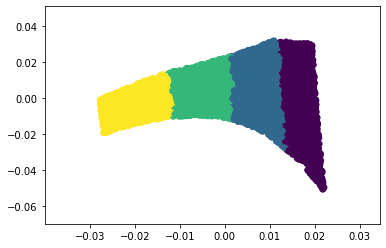

In [21]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c = z)
plt.show()

- Although the distance is not maintained on larger scale (left part is streched and right part is squeezed), It did a pretty good job at modelling the manifold.

<b>How LLE works?</b>
- The Algorithm identifies k closest neighbors and then tries to reconstruct $\mathbf{x}^{(i)}$ as a linear function of these neighbors.
- It finds the weights $\mathbf{w}_{i,j}$ such that the squared distance between $\mathbf{x}^{(i)}$ and $ \sum_{j=1}^{m}{\mathbf{w}_{i,j}\mathbf{x}^{(j)}} $ to be as small as possible.

$
\begin{split}
& \hat{\mathbf{W}} = \underset{\mathbf{W}}{\operatorname{argmin}}{\displaystyle \sum\limits_{i=1}^{m}} \left\|\mathbf{x}^{(i)} - \sum\limits_{j=1}^{m}{w_{i,j}}\mathbf{x}^{(j)}\right\|^2\\
& \text{subject to }
\begin{cases}
  w_{i,j}=0 & \text{if }\mathbf{x}^{(j)} \text{ is not one of the }k\text{ c.n. of }\mathbf{x}^{(i)}\\
  \sum\limits_{j=1}^{m}w_{i,j} = 1 & \text{for }i=1, 2, \dots, m
\end{cases}
\end{split}
$

- weight matrix $\hat{\mathbf{W}}$ (containing the weights $\mathbf{w}_{i, j}$) encodes the local linear relationships between the training instances.
- Now we reduce the dimensions keeping the weight constant.
-  If $\mathbf{z}^{(i)}$ is the image of $\mathbf{x}^{(i)}$ in this d-dimensional space, then we want the squared distance between $\mathbf{z}^{(i)}$ and $ \sum_{j=1}^{m}{\hat{w}_{i,j}\mathbf{z}^{(j)}} $ to be as small as possible.
$
\hat{\mathbf{Z}} = \underset{\mathbf{Z}}{\operatorname{argmin}}{\displaystyle \sum\limits_{i=1}^{m}} \left\|\mathbf{z}^{(i)} - \sum\limits_{j=1}^{m}{\hat{w}_{i,j}}\mathbf{z}^{(j)}\right\|^2
$

<b>Complexity</b>
- $\mathbf{O}(\mathbf{m} \mathbf{log(m)n} \mathbf{log(k)})$ for finding the k nearest neighbors, $\mathbf{O}(\mathbf{mnk}^3)$ for optimizing the weights, and $\mathbf{O(dm}^2)$ for constructing the low-dimensional representations.
- Due to the $\mathbf{m}^2$ term it scales poorly with data size.

### Other Dimentionality Reduction Techniques
1. <b>Multidimensional Scaling (MDS)</b>
    - reduces dimensionality while trying to preserve the distances between the instances.
    
2. <b>Isomap</b> 
    - creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the geodesic distances between the instances.
    
3. <b>t-Distributed Stochastic Neighbor Embedding (t-SNE)</b>
    - reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. 
    - It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space.
    
4. <b>Linear Discriminant Analysis (LDA)</b> 
    - It is actually a classification algorithm.
    - During training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data.
    - LDA is a good technique to reduce dimensionality before running another classification algorithm such as an SVM classifier.